## Project 1: Numerical Methods for Differential Equations

In [1]:
import numpy as np
import scipy.linalg as sc
import matplotlib.pyplot as plt 

# 1. Explicit Adaptive Runge-Kutta methods

### 1.1 Theory

#### 1.1.1 Runge-Kutta methods
For the initial value problem

\begin{equation}
    \tag{1}
    y' = f(t,y)
\end{equation}

The explicit Runge-Kutta method is applied as

\begin{equation}
    \tag{2}
    \int_{t_0}^{t_1}y'dt = \int_{t_0}^{t_1}f(t,y)dt
\end{equation}

Which for an analytic function $y$ this can be rewritten as

\begin{equation}
    \tag{3}
    y(t_1)-y(t_0) = \int_{t_0}^{t_1}f(t,y)dt
\end{equation}

$y$ on the right hand side is still unknown, but can be approximated over the grid $\{t+c_ih\}_{i=1}^s$ where $h$ is the steplength. This implies that $\int_{t_0}^{t_1}f(t,y)dt\approx\Sigma_{j=1}^shb_jf(t_n+c_jh,y(t_n+c_jh))$. With denotation $Y_j=y(t_n+c_jh)$, this gives the approximative step-method:

\begin{equation}
    \tag{4}
    y_{n+1}=y_n+\Sigma_{j=1}^shb_jf(t_n+c_jh,Y_j)
\end{equation}

With $Y_j':=f(t_n+c_jh,Y_j)$, the abbreviation $Y_j=y_n+\Sigma_{j=1}^{i-1}a_{i,j}Y_j'$ for unknown coefficients $a_{i,j}$. For the following part of the work, $Y_j$ are called stage values and $Y_j'$ are called stage derivatives.

Conclusively, the method can be summarized as:

\begin{equation}
    \tag{5}
        \begin{cases}
            Y_j=y_n+\Sigma_{j=1}^{i-1}a_{i,j}Y_j',\qquad i\in[1,s]\subset\mathbb{N}\\
            Y_j'=f(t_n+c_jh,Y_j),\qquad i\in[1,s]\subset\mathbb{N}\\
            y_{n+1}=y_n+\Sigma_{j=1}^sb_jhY_j'
        \end{cases}
\end{equation}

#### 1.1.2 Fourth order RK4
Using Taylor expansion to find the values for the coefficients, the following is obtained:
\begin{equation}
    \tag{6}
        \begin{cases}
            Y_1'=f(t_n,y_n)\\
            Y_2'=f(t_n+\frac{1}{2}h,y_n+\frac{1}{2}hY_1')\\
            Y_3'=f(t_n+\frac{1}{2}h,y_n+\frac{1}{2}hY_2')\\
            Y_4'=f(t_n+h,y_n+hY_3')\\
            y_{n+1}=y_n+\frac{1}{6}h(Y_1'+2Y_2'+2Y_3'+Y_4')
        \end{cases}
\end{equation}

# Task 1.1
Below a function taking an input $y_n$ and returns the next step according to the theory above.

In [2]:
def RK4_Step(f, t_n: float, y_n: np.array, h: float):
    dY_1 = f(t_n, y_n)
    dY_2 = f(t_n + (1/2) * h, y_n + (1/2) * h * dY_1)
    dY_3 = f(t_n + (1/2) * h, y_n + (1/2) * h * dY_2)
    dY_4 = f(t_n + h, y_n + h * dY_3)
    return y_n + (1/6)*h*(dY_1 + 2 * (dY_2 + dY_3) + dY_4)

#### Test of RK4

Below, the RK4_Step function is tested on the linear test function $y'=\lambda y, y(0)=1$ for $\lambda = 1$ In the intervall $t\in[0,10]$ and $h=0.01\implies \frac{10}{0.01}=1000$ steps

In [3]:
def linear_test_function(t, y):
    return y

t_grid = np.linspace(0,10,1000)
y      = np.zeros((1000, 2))


exact = np.zeros(1000)

y[0][:] = 1

exact[0] = 1

for j in range(1,1000):
    y[j][:] = RK4_Step(linear_test_function, t_grid[j], y[j - 1][:], 0.01)
    exact[j] = np.exp(t_grid[j])

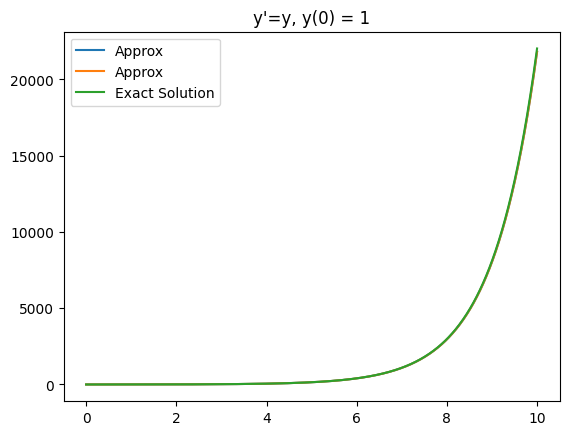

In [4]:
plt.plot(t_grid, y, label='Approx')
plt.plot(t_grid, exact, label='Exact Solution')
plt.title('y\'=y, y(0) = 1')
plt.legend()

## Embedded RK-methods

The third order RK-method instead uses stage derivatives:
\begin{equation}
    \tag{7}
        \begin{cases}
            Z_1'=f(t_n,y_n) = Y_1'\\
            Z_2'=f(t_n+\frac{1}{2}h,y_n+\frac{1}{2}hY_1')=Y_2'\\
            Z_3'=f(t_n+\frac{1}{2}h,y_n-hY_1'+2hY_2')\\
            z_{n+1} = \frac{1}{6}h(Y_1'+4Y_2'+Z_3')
        \end{cases}
\end{equation}
This implies that the local error from the fourth order RK-method is $l_{n+1}:=z_{n+1}-y_{n+1}=[\frac{1}{6}h(Y_1'+4Y_2'+Z_3')]-[y_n+\frac{1}{6}h(Y_1'+2Y_2'+2Y_3'+Y_4')]=\frac{1}{6}h[2Y_2'+Z_3'-2Y_3'-Y_4']$

This is used in the method $RK34Step$.

## Task 1.2

In [5]:
def RK34_Step(f, t_n, y_n, h):
    dY_1 = f(t_n, y_n)
    dY_2 = f(t_n + (1/2) * h, y_n + (1/2) * h * dY_1)
    dY_3 = f(t_n + (1/2) * h, y_n + (1/2) * h * dY_2)
    dY_4 = f(t_n + h, y_n + h * dY_3)
    dZ_3 = f(t_n + (1/2) * h, y_n - h * dY_1 + 2 * h * dY_2)

    RK4 = RK4_Step(f, t_n, y_n, h)

    l_err = (1 / 6) * h * (2 * dY_2 + dZ_3 - 2 * dY_3 - dY_4)
    
    return RK4, np.linalg.norm(l_err)

#### Test of Embedded RK-method

The following segment is used to test the embedded step-method above once again using the linear test function.

In [6]:
t_grid = np.linspace(0,10,1000)
z = np.zeros((1000, 2))

exact = np.zeros(1000)

error = np.zeros((1000, 2))

z[0][:] = 1

exact[0] = 1

error[0][:] = 0

for j in range(1,1000):
    z[j][:], error[j][:] = RK34_Step(linear_test_function, t_grid[j], z[j - 1][:], 0.01)


    exact[j] = np.exp(-t_grid[j])

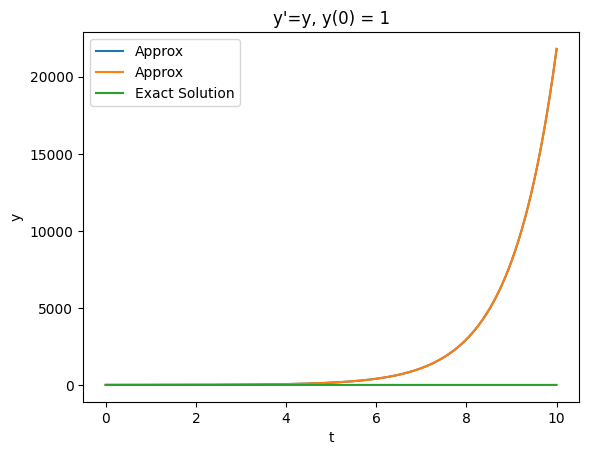

In [7]:
plt.plot(t_grid, z, label='Approx')
plt.plot(t_grid, exact, label='Exact Solution')
plt.title('y\'=y, y(0) = 1')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()

Text(0, 0.5, 'Log(error)')

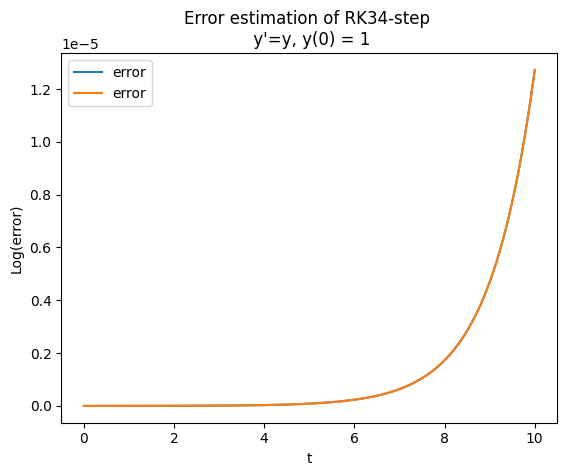

In [8]:
plt.plot(t_grid, error, label='error')
plt.title('Error estimation of RK34-step \n y\'=y, y(0) = 1')
plt.legend()
plt.xlabel('t')
plt.ylabel('Log(error)')

## 1.3 Error

Using the Euclidean norm $r_{n+1}:=||l_{n+1}||_2$ and assuming that the error is of the form $r_{n+1}=\phi_nh_n^k$ where $\phi_n$ is the principal error function and $h_n$ is, as before, the steplength. The objective of the following is to keep $r_n$ at a fixed value denoted prescribed accuracy tolerance $TOL$. Assuming that $\phi_n$  is relatively constant over small step lengths $h_n<<1$. From this follows:

\begin{equation}
\tag{8}
    h_{n}=\left(\frac{TOL}{r_n}\right)^{\frac{1}{k}}h_{n-1}
\end{equation}

Where $k$ is the order of the error estimator. A better estimation for $h_n$ is instead the P1-Controller

\begin{equation}
\tag{9}
    h_{n}=\left(\frac{TOL}{r_n}\right)^{\frac{2}{3k}}\left(\frac{TOL}{r_{n-1}}\right)^{-\frac{1}{3k}}h_{n-1}
\end{equation}
By recommendation, the initial stepsize is given by.
\begin{equation}
\tag{10}
    h_{0}=\frac{|t_f-t_0|(TOL)^{\frac{1}{4}}}{100(1+||f(y_0)||_2)}
\end{equation}

## Task 1.3

Below, a function for updating the steplength $h_n$ according to (9) follows

In [9]:
def h_n(tol, err, err_old, h_old, k):
    return (tol)**(1/(3*k))*(err)**(-2/(3*k))*(err_old)**(1/(3*k))*h_old

def h_0(f, tol: float, t0: float, tf: float, y0: np.array):
    return 0.01 * (np.sqrt(tf - t0)**2) * (tol)**(0.25) / (1 + np.linalg.norm(f(t0, y0)))

## Task 1.4 

Now, a new adaptive RK34 step method implementing the adaptive step length above and using a recursive method for evaluation is presented. The order of consistency of the method is $4$ why $k = 4$ is used.

In [10]:
def adaptiveRK34(f, t0: float, tf: float, y0: np.array, tol: float):
    # Initiaze arrays with initial values
    t = np.array([t0])

    # The first step has size h_0 defined above
    h = h_0(f, tol, t0, tf, y0)

    # For the first step, we use the RK34 method from before. This returns the y-value
    # and the local error for the first step. r_0 = tol as given in instructions
    r_old = tol
    y_n, r_curr = RK34_Step(f, t0, y0, h)

    # We define a variable for the current t-position and append the value for t and y 
    # in the initial vectors respectively
    t_curr = t0 + h
    t = np.append(t, t_curr)
    
    y0 = np.vstack((y0, y_n))

    # The stepping process with varying stepsize h is iterated until another step would 
    # take t_curr to a larger value than tf when the step h_n must be overridden
    while(t_curr + h_n(tol, r_curr, r_old, h, 4) < tf):
        h = h_n(tol, r_curr, r_old, h, 4)

        r_old  = r_curr
        
        y_n, r_curr = RK34_Step(f, t_curr, y0[-1], h)

        t_curr += h

        t = np.append(t, t_curr)
        y0 = np.vstack((y0, y_n))

    # The final step now hf = tf - t_curr and the final step is done accordingly
    h = tf - t_curr
    y_n, r_curr = RK34_Step(f, t_curr, y0[-1], h)

    t = np.append(t, tf)
    y0 = np.vstack((y0, y_n))
    

    return t, y0

## Testing of adaptive RK34-method

The function above is now tested on the linear test function in the intervall $[0,1]$ for $TOL=10^{-6}$

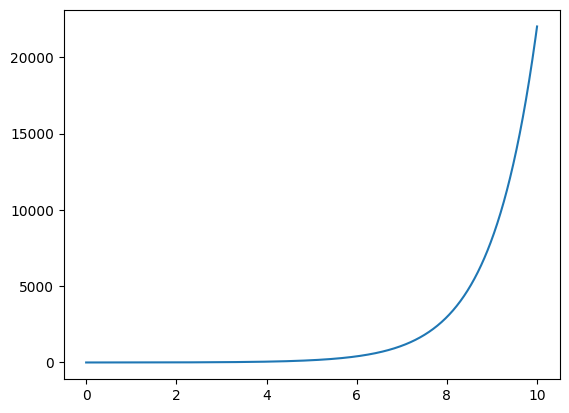

In [11]:
tol = 1e-6
t0  = 0
tf  = 10
y0  = np.array([1,1])

t, y = adaptiveRK34(linear_test_function, t0, tf, y0, tol)
plt.plot(t, y[:,-1])


## 2 A nonstiff problem

#### Theory
The Lotka-Volterra equation can be described as
\begin{equation}
\tag{11}
    \begin{cases}
        \frac{dx}{dt} = ax - bxy\\
        \frac{dy}{dt} = cxy - dy
    \end{cases}
\end{equation}
Rewritten in terms of differentials, it follows
\begin{equation}
\tag{12}
        \frac{dx}{dy} = \frac{x(a-by)}{y(cx-d)}\implies y(cx-d)dx=x(a-by)dy
\end{equation}

Integrating both sides gives that the function (13) is invariant for all solutions to (11).
\begin{equation}
\tag{13}
        H(x,y)=cx+by-d\ln{x}-a\ln{y}
\end{equation}
It can be proven that this implies that (11) has periodic solutions.

## Task 2.1

With the values $(a,b,c,d) = (3,9,15,15)$ and initial values $(x,y)=(1,1)$, the $adaptiveRK34$-method from above is used to study the solutions.

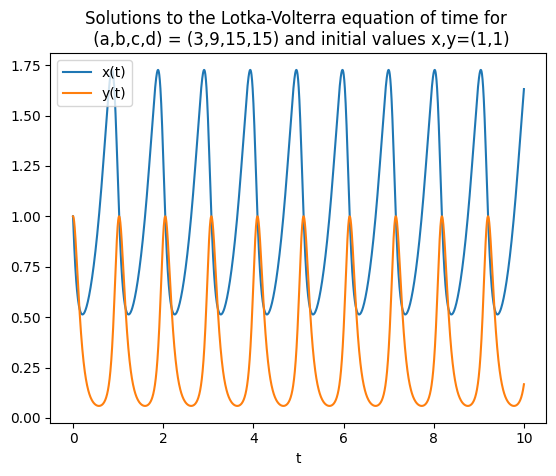

In [12]:
a = 3
b = 9
c = 15
d = 15


# The function H takes input as a numpy array Y = [x,y] which gives that x = Y[0] and y = Y[1]
def Lotka_Volterra(t, Y):
    return np.array([a * Y[0] - b * Y[0] * Y[1], c * Y[0] * Y[1] - d * Y[1]])

y0  = np.array([1,1])
tol = 1e-8

t, y = adaptiveRK34(Lotka_Volterra, 0, 10, y0, tol)
plt.plot(t, y[:,0], label='x(t)')
plt.plot(t, y[:,1], label='y(t)')
plt.xlabel('t')
plt.title('Solutions to the Lotka-Volterra equation of time for \n (a,b,c,d) = (3,9,15,15) and initial values x,y=(1,1)')
plt.legend()

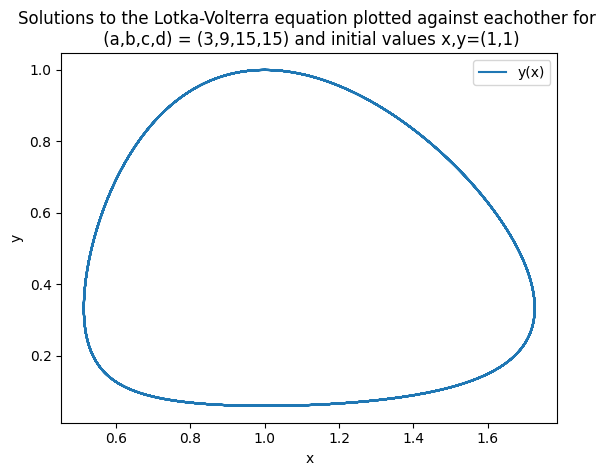

In [13]:
plt.plot(y[:,0], y[:,1], label='y(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Solutions to the Lotka-Volterra equation plotted against eachother for \n (a,b,c,d) = (3,9,15,15) and initial values x,y=(1,1)')
plt.legend()

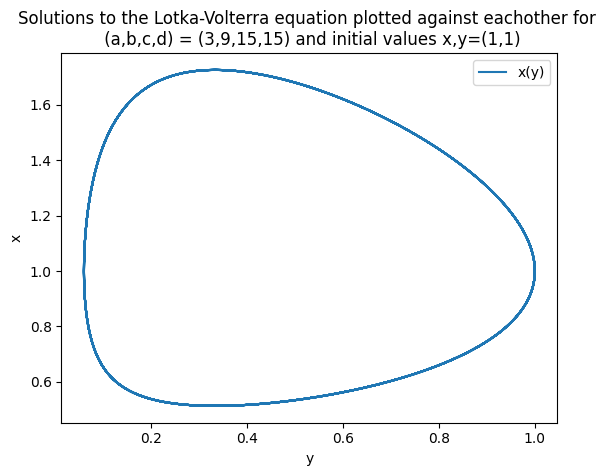

In [14]:
plt.plot(y[:,1], y[:,0], label='x(y)')
plt.xlabel('y')
plt.ylabel('x')
plt.title('Solutions to the Lotka-Volterra equation plotted against eachother for \n (a,b,c,d) = (3,9,15,15) and initial values x,y=(1,1)')
plt.legend()

Since the plot of $y(x)$ and $x(y)$ is clearly orbital, the solutions $(x,y)$ are evidently periodical.

To investigate further if the function $H$ defined above is constant, a plotting for the norm of the difference:
\begin{equation}
\tag{14}
    \left|\frac{H(x,y)}{H(x_0,y_0)}-1\right|
\end{equation}
Where $(x_0,y_0)$ is the initial values. If the function is in fact constant, the resulting plot should be zero for all solutions $(x,y)$. This is tested with a log-log plot of the solutions over a long period of time.

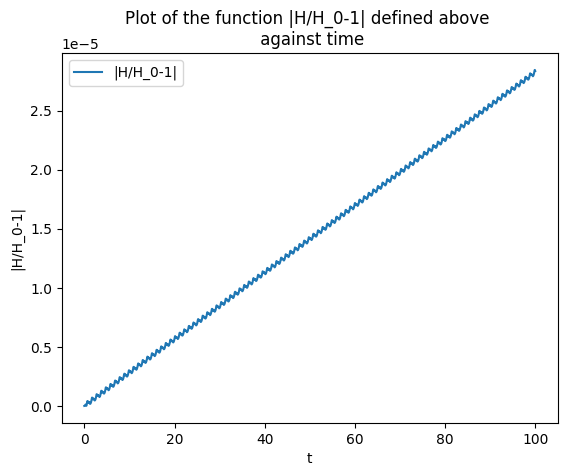

In [15]:
def H(x,y):
    return c * x + b * y - d * np.log(x) - a * np.log(y)

t, Y = adaptiveRK34(Lotka_Volterra, 0, 100, np.array([1,1]), 1e-6)

H_vec = np.zeros_like(Y[:,0])
H0 = H(1,1)

for k in range(len(H_vec)):
    x = float(Y[k,0])
    y = float(Y[k,1])
    H_vec[k] = np.linalg.norm((H(x,y)/H0-1))

plt.plot(t, H_vec, label='|H/H_0-1|')
plt.xlabel('t')
plt.ylabel('|H/H_0-1|')
plt.title('Plot of the function |H/H_0-1| defined above \n against time')
plt.legend()

## 3 A Stiff and Non-Stiff Problem
In Project0.ipynb enclosed, both the explicit Euler method:
\begin{equation*}
    \begin{cases}
        y_{n+1} = y_n + Ah\\
        y_0=y(t_0)
    \end{cases}
\end{equation*}
and the implicit method:
\begin{equation*}
    \begin{cases}
        y_{n+1} = y_n + Ay_{n+1}h\\
        y_0=y(t_0)
    \end{cases}
    \implies
    \begin{cases}
        y_{n+1} = (I-Ah)^{-1}y_n
    \end{cases}
\end{equation*}
Have been discussed and used

#### The van der Pol equation
Equation (15)
\begin{equation}
\tag{15}
    \begin{cases}
        y'_1=y_2\\
        y'_2=\mu(1-y_1^2)y_2-y_1
    \end{cases}
\end{equation}
models an electric oscillator circuit. The solutions are periodic with an approximate period of $2\mu$. The system can be both stiff and non-stiff depending on $\mu$. Primarily, the initial value of $y(0)=[2,0]^T$ is studied.

## Task 3.1
The van der Pol equation (15) is solved for $y(0)=[2,0]^T$, $\mu = 100$ on the intervall $[0,2\mu]$ using the adaptiveRK34 method from part 1 of the work.

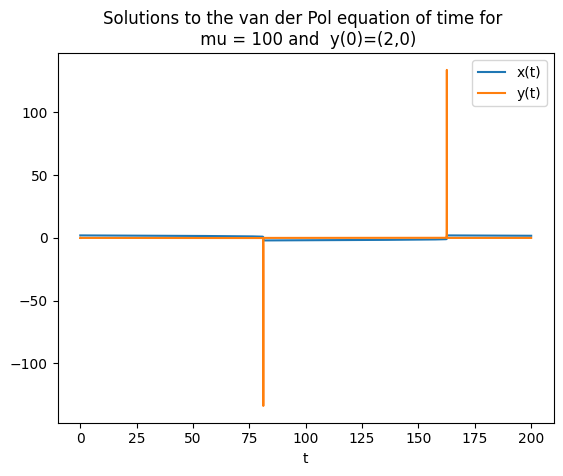

In [16]:
mu = 100
t0 = 0
tf = 200
y0 = np.array([2,0])

def vanDerPol_100(t, Y: np.array):
    return np.array([Y[1], mu * (1 - (Y[0])**2) * Y[1] - Y[0]])


t, y = adaptiveRK34(vanDerPol_100, t0, tf, y0, 1e-6)

plt.plot(t, y[:,0], label='x(t)')
plt.plot(t, y[:,1], label='y(t)')
plt.xlabel('t')
plt.title('Solutions to the van der Pol equation of time for \n mu = 100 and  y(0)=(2,0)')
plt.legend()

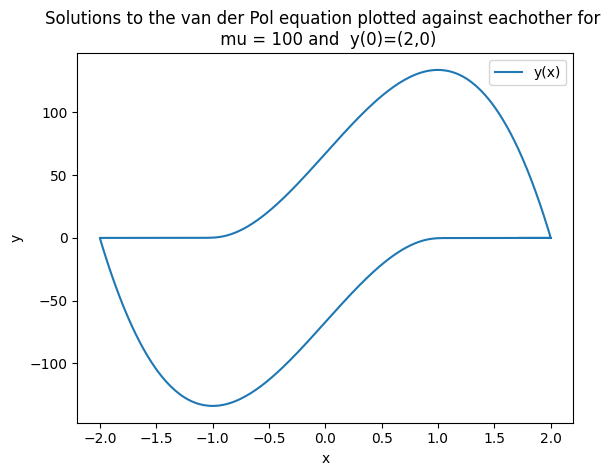

In [17]:
plt.plot(y[:,0], y[:,1], label='y(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Solutions to the van der Pol equation plotted against eachother for \n mu = 100 and  y(0)=(2,0)')
plt.legend()

For other initial values, etc. $y(0) = [5,8]^T$ the solution is plotted below.

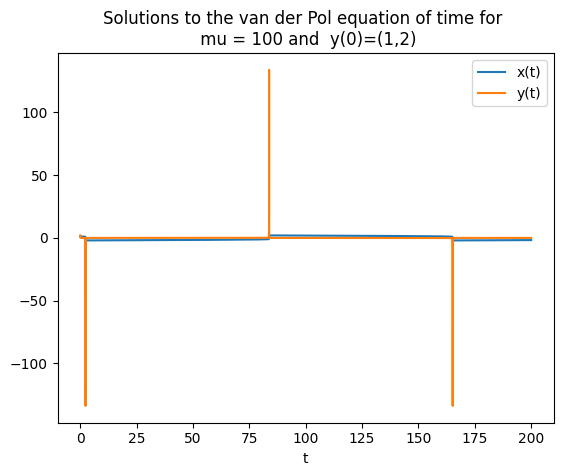

In [18]:
y0 = np.array([1,2])

t, y = adaptiveRK34(vanDerPol_100, t0, tf, y0, 1e-6)

plt.plot(t, y[:,0], label='x(t)')
plt.plot(t, y[:,1], label='y(t)')
plt.xlabel('t')
plt.title('Solutions to the van der Pol equation of time for \n mu = 100 and  y(0)=(1,2)')
plt.legend()

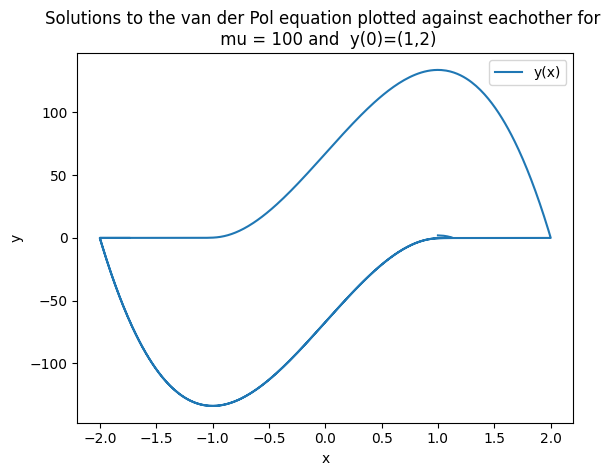

In [19]:
plt.plot(y[:,0], y[:,1], label='y(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Solutions to the van der Pol equation plotted against eachother for \n mu = 100 and  y(0)=(1,2)')
plt.legend()

## Task 3.2

For the following task, the stiffness of the van der Pol equation and it's dependence of $\mu$ is studied. Using the initial conditions $y(0)=[2,0]^T$ and the intervall $t\in[0,0.7\mu]$ for selected values of $\mu$, the 

## TODO

In [20]:
def adaptiveRK34_with_counter(f, t0: float, tf: float, y0: np.array, tol: float):
    # Initiaze arrays with initial values
    t = np.array([t0])

    # The first step has size h_0 defined above
    h = h_0(f, tol, t0, tf, y0)

    # For the first step, we use the RK34 method from before. This returns the y-value
    # and the local error for the first step. r_0 = tol as given in instructions
    r_old = tol
    y_n, r_curr = RK34_Step(f, t0, y0, h)

    # We define a variable for the current t-position and append the value for t and y 
    # in the initial vectors respectively
    t_curr = t0 + h
    N = 1
    t = np.append(t, t_curr)
    
    y0 = np.vstack((y0, y_n))

    # The stepping process with varying stepsize h is iterated until another step would 
    # take t_curr to a larger value than tf when the step h_n must be overridden
    while(t_curr + h_n(tol, r_curr, r_old, h, 4) < tf):
        h = h_n(tol, r_curr, r_old, h, 4)

        r_old  = r_curr
        
        y_n, r_curr = RK34_Step(f, t_curr, y0[-1], h)

        t_curr += h

        t = np.append(t, t_curr)
        y0 = np.vstack((y0, y_n))
        N += 1

    # The final step now hf = tf - t_curr and the final step is done accordingly
    h = tf - t_curr
    y_n, r_curr = RK34_Step(f, t_curr, y0[-1], h)

    t = np.append(t, tf)
    y0 = np.vstack((y0, y_n))
    N += 1
    

    return t, y0, N

Text(0, 0.5, 'Number of steps used')

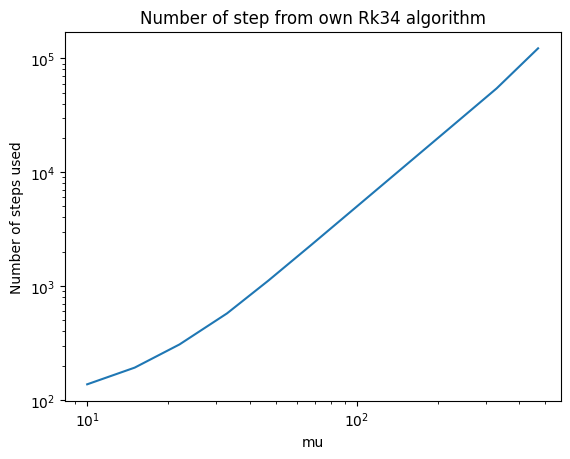

In [28]:
mu_E6 = np.array([10, 15, 22, 33, 47, 68, 100, 150, 220, 330, 470]) # 680, 1000 removed
N_E6  = np.zeros_like(mu_E6)
t0 = 0
y0 = np.array([2,0])

for i, mu in enumerate(mu_E6): 
    def vanDerPol(t, Y: np.array):
        return np.array([Y[1], mu * (1 - (Y[0])**2) * Y[1] - Y[0]])
    
    tf = 0.7 * mu
    t, y, N_E6[i] = adaptiveRK34_with_counter(vanDerPol, t0, tf, y0, 1e-6)

plt.loglog(mu_E6, N_E6, label='Number of iterations required plotted against mu')
plt.title("Number of step from own Rk34 algorithm")
plt.xlabel("mu")
plt.ylabel("Number of steps used")

## Task 3.3

Using scipy.integrate.solve.IVP with the method "Backvard differentiation formula" yields for the same series as above

Text(0, 0.5, 'Number of steps used')

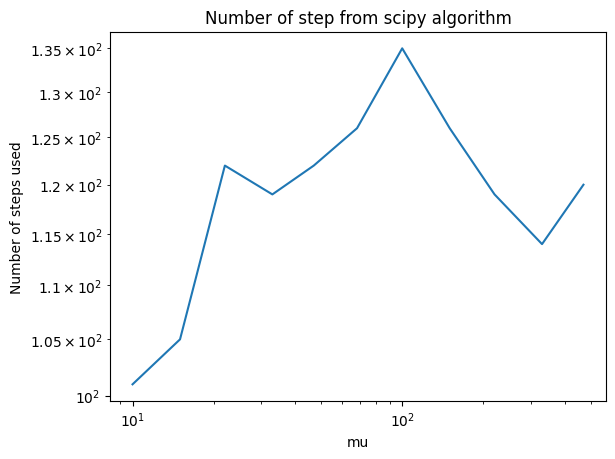

In [27]:
from scipy.integrate import solve_ivp

N_E6_scipy = np.zeros_like(mu_E6)

for i, mu in enumerate(mu_E6): 
    def vanDerPol_100(t, Y: np.array):
        return np.array([Y[1], mu * (1 - (Y[0])**2) * Y[1] - Y[0]])

    tf = 0.7 * mu
    N_E6_scipy[i] = solve_ivp(vanDerPol, (0, 0.7*mu), [2,0], method='BDF', dense_output=True).nfev

plt.loglog(mu_E6, N_E6_scipy)
plt.title("Number of step from scipy algorithm")
plt.xlabel("mu")
plt.ylabel("Number of steps used")

This took a few to run for the full series compared to almost two minutes for the explicit method which could not handle values $680, 1000$ without runtime error. Evidently, solve_ivp is superior.

Below, an attempt for $\mu = 10 000$ is done

In [24]:
def vanDerPol_10000(t, Y: np.array):
    return np.array([Y[1], 10000 * (1 - (Y[0])**2) * Y[1] - Y[0]])

nfev = solve_ivp(vanDerPol, (0, 0.7*10000), [2,0], method='BDF', dense_output=True).nfev